In [7]:
from generate_fragments import generate_fragments
from Multi_Nuclei_Segmentation import create_images, optimise_fragments, multi_segmentation
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter

3it [00:00, 16.96it/s]


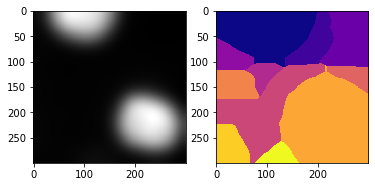

In [8]:
image = plt.imread('images/dna-images/gnf/dna-6.png')[:300,:300,0]   
Omega,S = generate_fragments(image,16,0.01,20,2,100)


gaus_img = gaussian_filter(image,16)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(gaus_img,cmap='gray')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(Omega,cmap='plasma')

In [9]:
Z = list(S)
ListOfCoords = create_images(Omega, Z)
len(Z)

48

In [10]:
theta, f = optimise_fragments(image, ListOfCoords)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-2)]: Done  27 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done  40 out of  48 | elapsed:  1.7min remaining:   20.5s
[Parallel(n_jobs=-2)]: Done  45 out of  48 | elapsed:  1.9min remaining:    7.5s
[Parallel(n_jobs=-2)]: Done  48 out of  48 | elapsed:  2.2min finished


In [11]:
seg = multi_segmentation(image, Omega, list(S), f, np.median(f), theta)

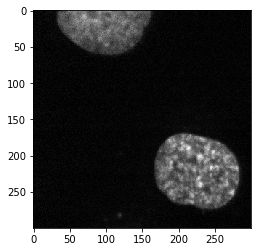

[]

In [13]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for contour in seg:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.show()